In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("fish.csv",sep=",")
print(df)


    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [277]:
print(df.dtypes)
print(df.Species.unique())
print(df[df.duplicated()])
print(df.isnull().sum())

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object
['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
Empty DataFrame
Columns: [Species, Weight, Length1, Length2, Length3, Height, Width]
Index: []
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [278]:
B=df[df.Species=="Bream"]
R=df[df.Species=="Roach"]
W=df[df.Species=="Whitefish"]
P=df[df.Species=="Parkki"]
Pe=df[df.Species=="Perch"]
Pi=df[df.Species=="Pike"]
S=df[df.Species=="Smelt"]


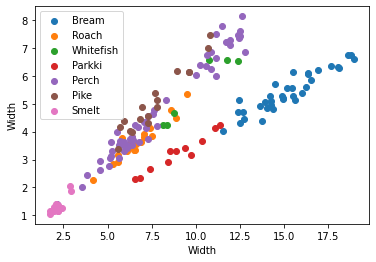

In [279]:
plt.scatter(B.Height  ,B.Width     ,label="Bream")
plt.scatter(R.Height  ,R.Width     ,label="Roach")
plt.scatter(W.Height  ,W.Width     ,label="Whitefish")
plt.scatter(P.Height  ,P.Width     ,label="Parkki")
plt.scatter(Pe.Height ,Pe.Width    ,label="Perch")
plt.scatter(Pi.Height ,Pi.Width    ,label="Pike")
plt.scatter(S.Height  ,S.Width     ,label="Smelt")

plt.xlabel("Width")
plt.ylabel("Width")
plt.legend()
plt.show()

In [280]:
i=1
for fish in df.Species.unique():
    df.Species[df.Species==fish]=i
    i+=1
print(df.dtypes)

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object


<ipython-input-280-bbb8418b23f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Species[df.Species==fish]=i


In [312]:
y=df.Species.values.astype(float)
x_data=df.drop(["Species"],axis=1)


In [313]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

print(x)

       Weight   Length1   Length2   Length3    Height     Width
0    0.146667  0.304854  0.309091  0.358108  0.568334  0.418978
1    0.175758  0.320388  0.325455  0.378378  0.624055  0.459235
2    0.206061  0.318447  0.329091  0.376689  0.618123  0.514279
3    0.220000  0.365049  0.374545  0.417230  0.638566  0.480365
4    0.260606  0.368932  0.374545  0.425676  0.621966  0.576004
..        ...       ...       ...       ...       ...       ...
154  0.007394  0.077670  0.069091  0.077703  0.021012  0.048771
155  0.008121  0.081553  0.072727  0.079392  0.040723  0.031208
156  0.007394  0.089320  0.083636  0.084459  0.031842  0.029347
157  0.011939  0.110680  0.107273  0.108108  0.066424  0.143719
158  0.012061  0.122330  0.120000  0.125000  0.069872  0.117219

[159 rows x 6 columns]


In [314]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.35,random_state=1)
print(x_train.dtypes,y_train.dtype)

Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object float64


KNN

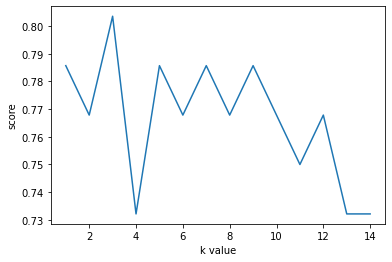

0.8035714285714286


In [315]:
from sklearn.neighbors import KNeighborsClassifier
score_list=[]
for i in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k value")
plt.ylabel("score")
plt.show()
print(np.max(score_list))

In [316]:
knn=KNeighborsClassifier(n_neighbors=np.argmax(score_list)+1)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_score=knn.score(x_test,y_test)
print(knn_score)

0.8035714285714286


SVM

In [317]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)

print("svm score:",svm.score(x_test,y_test))

svm score: 0.7678571428571429


Decision Tree

In [318]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

print("dt score:",dt.score(x_test,y_test))

dt score: 0.7857142857142857


Random Forest

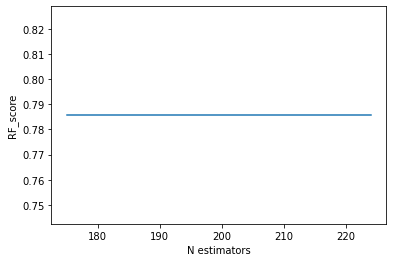

175
rf score: 0.7857142857142857


In [319]:
from sklearn.ensemble import RandomForestClassifier
score_list=[]
for i in range(175,225):
    rf=RandomForestClassifier(n_estimators=i, random_state=1)
    rf.fit(x_train,y_train)
    score_list.append(rf.score(x_test,y_test))
    #print(rf.score(x_test,y_test))
plt.plot(range(175,225),score_list)
plt.xlabel("N estimators")
plt.ylabel("RF_score")
plt.show()
rf=RandomForestClassifier(n_estimators=np.argmax(score_list)+175, random_state=1)
rf.fit(x_train,y_train)
print(np.argmax(score_list)+175)
print("rf score:",rf.score(x_test,y_test))